In [52]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = []

results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
#  3. Convert the June temperatures to a list.
june_temp_list = []
june_temp_list = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

print(june_temp_list)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns=['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = []

results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

print(results)


[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [10]:
# 7. Convert the December temperatures to a list.
dec_temp_list = []
dec_temp_list = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

print(dec_temp_list)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp_list, columns=['December Temps'])
dec_temp_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Additional queries

In [13]:
#  10. Convert the June precipitation to a list.
june_prcp_list = []
june_prcp_list = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

print(june_prcp_list)

[(0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.07,), (0.0,), (0.56,), (0.89,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.05,), (0.06,), (0.07,), (None,), (0.0,), (0.0,), (0.01,), (0.01,), (0.0,), (0.02,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.15,), (0.01,), (0.0,), (0.05,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.37,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.04,), (0.12,), (0.04,), (0.02,), (0.35,), (0.03,), (0.01,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.66,), (0.01,), (0.0,), (0.0

In [14]:
# 11. Create a DataFrame from the list of precipitation for the month of June. 
june_prcp_df = pd.DataFrame(june_prcp_list, columns=['June Precipitations'])
june_prcp_df

,June Precipitations
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [15]:
# 12. Calculate and print out the summary statistics for the June Precipitation DataFrame.
june_prcp_df.describe()

,June Precipitations
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [18]:
#  13. Convert the Dec precipitation to a list.
dec_prcp_list = []
dec_prcp_list = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

# 14. Create a DataFrame from the list of precipitation for the month of June. 
dec_prcp_df = pd.DataFrame(dec_prcp_list, columns=['December Precipitations'])
dec_prcp_df

# 16. Calculate and print out the summary statistics for the December Precipitation DataFrame.
dec_prcp_df.describe()

,December Precipitations
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [21]:
temp_stats_june = june_temp_df.describe()
temp_stats_dec = dec_temp_df.describe()

prcp_stats_june = june_prcp_df.describe()
prcp_stats_dec = dec_prcp_df.describe()


In [22]:

temp_summ_stats_df = june_temp_df.merge(dec_temp_df,right_index=True,left_index=True)
temp_summ_stats_df

,June Temps,December Temps
0,78.0,76.0
1,76.0,74.0
2,78.0,74.0
3,76.0,64.0
4,77.0,64.0
...,...,...
1512,71.0,71.0
1513,73.0,71.0
1514,72.0,69.0
1515,74.0,65.0


In [45]:

prcp_summ_stats_df = june_prcp_df.merge(dec_prcp_df,right_index=True,left_index=True)
prcp_summ_stats_df

,June Precipitations,December Precipitations
0,0.00,0.04
1,0.01,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
...,...,...
1512,0.14,0.14
1513,0.01,0.14
1514,0.83,1.03
1515,0.18,2.37


In [43]:
# station queries for June 
june_station_list = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6).all()
# print(june_station_list)
june_station_df = pd.DataFrame(june_station_list, columns=['June Temps', 'Station']).reset_index(drop=True)
june_station_df

,June Temps,Station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
...,...,...
1695,79.0,USC00516128
1696,74.0,USC00516128
1697,74.0,USC00516128
1698,76.0,USC00516128


In [27]:
# station queries for December 
dec_station_list = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12).all()
# print(june_station_list)
dec_station_df = pd.DataFrame(dec_station_list, columns=['December Temps', 'Station'])
dec_station_df

,December Temps,Station
0,76.0,USC00519397
1,74.0,USC00519397
2,74.0,USC00519397
3,64.0,USC00519397
4,64.0,USC00519397
...,...,...
1512,71.0,USC00516128
1513,71.0,USC00516128
1514,69.0,USC00516128
1515,65.0,USC00516128


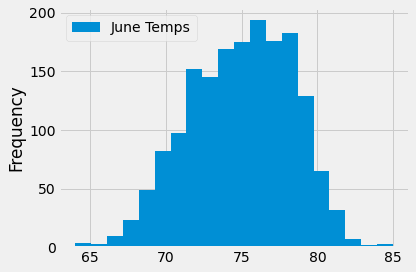

In [55]:
june_station_df.plot.hist(bins=20)
plt.tight_layout()

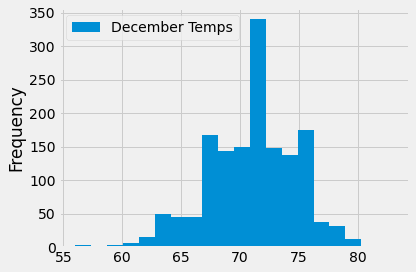

In [60]:
dec_station_df.plot.hist(bins=20)
plt.tight_layout()

     tobs
0    71.0
1    71.0
2    72.0
3    72.0
4    76.0
..    ...
231  73.0
232  76.0
233  77.0
234  76.0
235  76.0

[236 rows x 1 columns]


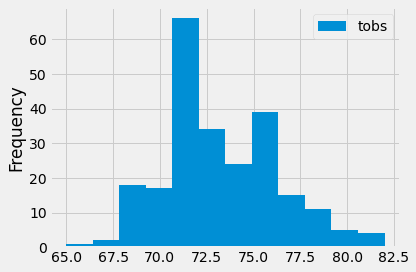

In [59]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Choose the station with the highest number of temperature observations.
# Query the last June temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month',Measurement.date)== 6).all()

# print(results)

df = pd.DataFrame(results, columns=['tobs'])
print(df)

df.plot.hist(bins=12)
plt.tight_layout()

Text(0.5, 0, 'Month')

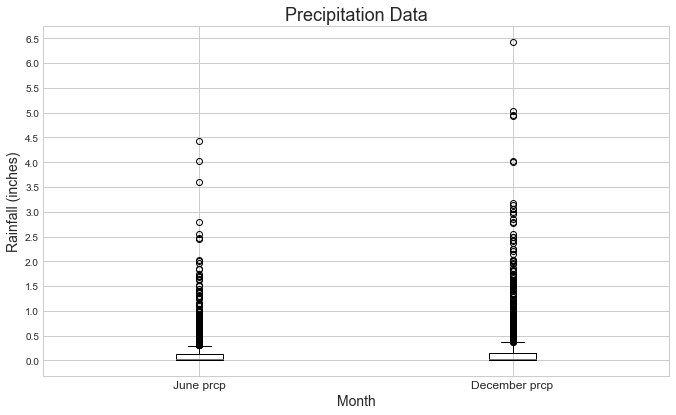

In [77]:
#Style
plt.style.use('seaborn-whitegrid')
#Drop the null values:
june_prcp_df = june_prcp_df.dropna()
dec_prcp_df = dec_prcp_df.dropna()

#Plot the Box & Whiskers
x_labels = ["June prcp", "December prcp"]
temps = [june_prcp_df["June Precipitations"], dec_prcp_df["December Precipitations"]]
# temps = [june_prcp_df, dec_prcp_df]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(0, 7, step=0.5))
ax.set_title('Precipitation Data',fontsize=18)
ax.set_ylabel('Rainfall (inches)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

Text(0.5, 0, 'Month')

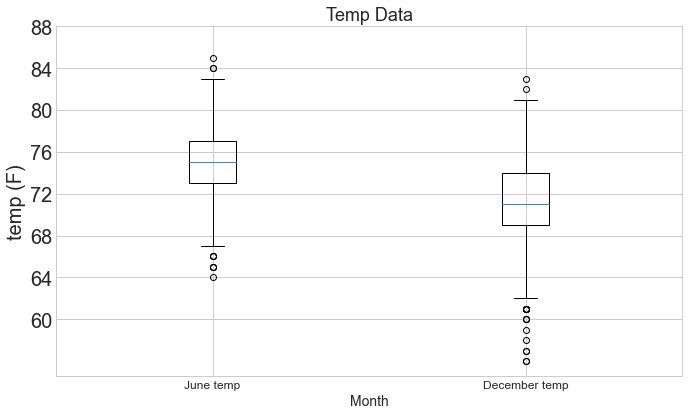

In [83]:
#Style
plt.style.use('seaborn-whitegrid')
#Drop the null values:
june_temp_df = june_temp_df.dropna()
dec_temp_df = dec_temp_df.dropna()

#Plot the Box & Whiskers
x_labels = ["June temp", "December temp"]
temps = [june_temp_df["June Temps"], dec_temp_df["December Temps"]]
# temps = [june_prcp_df, dec_prcp_df]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

ax.set_yticks(np.arange(60, 90, step=4.0))
ax.set_title('Temp Data',fontsize=18)
ax.set_ylabel('temp (F)',fontsize=20)
ax.set_xlabel("Month",fontsize=14)